In [ ]:
# pip install spacy

In [ ]:
# !pip install spacy
# !python -m spacy download es_core_news_sm

In [ ]:
# !python -m spacy download es_core_news_sm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# dataset = pd.read_csv("../entry_dataset.csv", sep=";", index_col=0)
# dataset.describe()

In [27]:
# df_mini = dataset[['ticker','date','body','r_adj']].copy()
# df_mini

In [28]:
# print(df_mini.r_adj.quantile(0.2))
# print(df_mini.r_adj.quantile(0.8))

In [29]:
# def labelling(row, quantile_inf, quantile_sup):
#     if row.r_adj <= quantile_inf:
#         row['label'] = -1
#     elif row.r_adj >= quantile_sup:
#         row['label'] = 1
#     else:
#         row['label'] = 0
#     return row

In [30]:
# df_mini = df_mini.apply(
#     lambda row: labelling(row,df_mini.r_adj.quantile(0.2),df_mini.r_adj.quantile(0.8)), axis=1
# )

In [31]:
# df_mini.to_csv("../label_dataset.csv", sep=";")

In [2]:
df_mini = pd.read_csv("../label_dataset.csv", sep=";", index_col=0)

In [3]:
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tienda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
stop = stopwords.words('spanish')
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [6]:
df_mini = df_mini[df_mini['label'] != 0]
# df_mini = df_mini[df_mini['label'] > 0] #positivos
# df_mini = df_mini[df_mini['label'] < 0] #negativos

In [7]:
df_mini.shape

(21341, 5)

In [8]:
df_mini

,ticker,date,body,r_adj,label
6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1
7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1
8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1
9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1
10,ANA,2021-01-07 15:28:06.000,El asalto al capitolio no ha asus...,0.012283,1
...,...,...,...,...,...
53473,TEF,2021-12-30 06:13:41.000,"“Todos tendrán su baja, tal y como se ha hecho...",-0.019280,-1
53474,TEF,2021-12-30 08:27:05.000,La última sesión del año en la Bolsa española ...,-0.019280,-1
53475,TEF,2021-12-30 08:31:09.000,17:46La Comunidad Valenciana notifica 10.889 n...,-0.019280,-1
53476,TEF,2021-12-30 08:52:26.000,19:12Compromís pide a Ximo Puig «evaluar todas...,-0.019280,-1


In [56]:
#MODELO 1 : TODAS LAS FEATURES, 90970 

In [9]:
df_mini['texto_limpio'] = df_mini['body'].apply(
    lambda x: ' '.join(
        [word.lower() for word in x.split() 
        if word.lower() not in (stop) and word.isalnum()]
        )
    )
df_mini.head(4)

,ticker,date,body,r_adj,label,texto_limpio
6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1,ibex 35 tocado momentos niveles veía marzo ini...
7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1,presidente joe hecho control dos cámaras congr...
8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1,7 ibex 35 caía media sesión llevaba selectivo ...
9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1,7 obras adecuación desdoble carretera acceso m...


In [10]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [11]:
np.unique(labels)

array([0, 1], dtype=int64)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df_mini["texto_limpio"])
dense_matrix = pd.DataFrame(text_tf.todense())
dense_matrix.head(4)

,0,1,2,3,4,5,6,7,8,9,...,90776,90777,90778,90779,90780,90781,90782,90783,90784,90785
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# aleat = np.random.choice(dense_matrix.shape[0], 2000, replace=False)
aleat = np.random.choice(dense_matrix.shape[0], int(dense_matrix.shape[0]*0.3), replace=False)
X = dense_matrix.iloc[aleat,:]
X_test = dense_matrix.iloc[~aleat,:]
y = labels[aleat]
y_test = labels[~aleat]

In [14]:
model = Sequential()
model.add(Dense(8, input_dim=dense_matrix.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

history = model.fit(X, y, epochs=50, batch_size=128, shuffle=True, validation_data = (X_test, y_test))

Epoch 1/50
51/51 [==============================] - 44s 714ms/step - loss: 0.6927 - accuracy: 0.5111 - val_loss: 0.6895 - val_accuracy: 0.5139
Epoch 2/50
51/51 [==============================] - 26s 513ms/step - loss: 0.6721 - accuracy: 0.6651 - val_loss: 0.6676 - val_accuracy: 0.6362
Epoch 3/50
51/51 [==============================] - 26s 512ms/step - loss: 0.6037 - accuracy: 0.8202 - val_loss: 0.6367 - val_accuracy: 0.6543
Epoch 4/50
51/51 [==============================] - 34s 681ms/step - loss: 0.5101 - accuracy: 0.8636 - val_loss: 0.6099 - val_accuracy: 0.6600
Epoch 5/50
51/51 [==============================] - 34s 672ms/step - loss: 0.4176 - accuracy: 0.8824 - val_loss: 0.5943 - val_accuracy: 0.6653
Epoch 6/50
51/51 [==============================] - 29s 585ms/step - loss: 0.3401 - accuracy: 0.8966 - val_loss: 0.5937 - val_accuracy: 0.6631
Epoch 7/50
51/51 [==============================] - 26s 521ms/step - loss: 0.2839 - accuracy: 0.9008 - val_loss: 0.6045 - val_accuracy: 0.6642

In [15]:
preds = model.predict(X_test)
acc = [np.argmax(preds[i])==y_test[i] for i in range(len(preds))]
print(f"precision: {np.sum(acc)/len(acc)}")

precision: 0.669009684473602


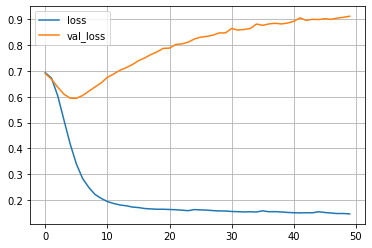

In [16]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

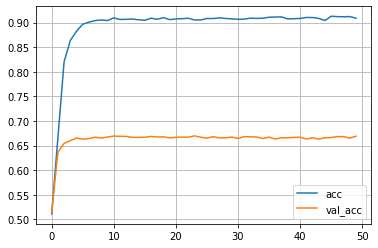

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()

In [ ]:
#MODELO 2 : PODA FEATURES, 5000 MAS FRECUENTES

In [9]:
df_mini['texto_limpio'] = df_mini['body'].apply(
    lambda x: ' '.join(
        [word.lower() for word in x.split() 
        if word.lower() not in (stop) and word.isalnum()]
        )
    )
df_mini.head(4)

,ticker,date,body,r_adj,label,texto_limpio
6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1,ibex 35 tocado momentos niveles veía marzo ini...
7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1,presidente joe hecho control dos cámaras congr...
8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1,7 ibex 35 caía media sesión llevaba selectivo ...
9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1,7 obras adecuación desdoble carretera acceso m...


In [10]:
df_mini.shape

(21341, 6)

In [11]:
# SE EXPLORA EL CAMPO TEXTO_LIMPIO
print(df_mini["texto_limpio"].str.len().argmax())
print(df_mini["texto_limpio"].str.len().mean())

11250
1879.1293285225622


In [12]:
# df_mini.iloc[11250,5]

In [13]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [14]:
np.unique(labels)

array([0, 1], dtype=int64)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
token = RegexpTokenizer(r'[a-zA-ZÀ-ÿ0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize)

In [18]:
# df_mini = df_mini.iloc[0:100,:]

In [17]:
cv.fit(df_mini['texto_limpio'])
  
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", cv.vocabulary_)

c:\Users\Tienda\Desktop\MasterIA\TFM\tfm-miax7\venv\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-ZÀ-ÿ0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)

In [18]:
# Encode the Document
vector = cv.transform(df_mini['texto_limpio'])
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
name_features = pd.DataFrame(vector.toarray(), columns=cv.get_feature_names(), index= df_mini.index)
name_features

c:\Users\Tienda\Desktop\MasterIA\TFM\tfm-miax7\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,0000,00000,0002,0015,00206,003,0032,...,único,únicos,úrsula,útero,útil,útiles,útimas,útimo,útimos,útlimos
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#SUMAMOS POR COLUMNAS PARA VER LAS FEATURES MAS FRECUENTES
sum_dense_matrix = name_features.sum(axis=0)
sum_dense_matrix

0          138
00          26
000         22
0000         1
00000        6
          ... 
útiles      65
útimas       3
útimo        1
útimos       2
útlimos      1
Length: 90720, dtype: int64

In [21]:
sum_dense_matrix.sort_values(ascending=False)

millones         32652
mientras         18873
tras             17193
euros            16908
año              16138
                 ...  
desempolvando        1
paparazzi            1
papal                1
desencadenaba        1
útlimos              1
Length: 90720, dtype: int64

In [22]:
#NOS QUEDAMOS CON LAS 5000 FEATURES MAS FRECUENTES
df_order = sum_dense_matrix.sort_values(ascending=False)
df_order = df_order[0:5000]
df_order

millones       32652
mientras       18873
tras           17193
euros          16908
año            16138
               ...  
permiso          141
tomás            140
empezando        140
fabricar         140
colocándose      140
Length: 5000, dtype: int64

In [23]:
df_dense_mini = name_features.loc[:,df_order.index.values]
df_dense_mini

,millones,mientras,tras,euros,año,según,banco,años,empresas,mercado,...,tome,aportan,remuneraciones,residencial,innovadora,permiso,tomás,empezando,fabricar,colocándose
6,1,1,4,1,0,0,0,2,2,4,...,0,0,0,0,0,0,0,0,0,0
7,2,1,1,0,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,2,2,1,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,2,0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53473,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
53474,0,1,3,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53475,0,0,0,0,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53476,0,0,2,0,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_dense_mini.shape

(21341, 5000)

In [40]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [43]:
df_dense_mini.shape, labels.shape

((21341, 5000), (21341,))

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
            df_dense_mini.values, labels, test_size=0.33
        )

In [45]:
##### WARN CON EL COUNT VECTORICER HAY QUE ESCALAR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)
#####

In [46]:
model2 = Sequential()
model2.add(Dense(8, input_dim=df_dense_mini.shape[1], activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [47]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

In [48]:
history = model2.fit(x_train, y_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/50
90/90 [==============================] - 43s 335ms/step - loss: 0.7499 - accuracy: 0.5207 - val_loss: 0.7013 - val_accuracy: 0.5364
Epoch 2/50
90/90 [==============================] - 24s 269ms/step - loss: 0.6113 - accuracy: 0.6610 - val_loss: 0.7263 - val_accuracy: 0.5392
Epoch 3/50
90/90 [==============================] - 32s 358ms/step - loss: 0.5499 - accuracy: 0.7014 - val_loss: 0.7628 - val_accuracy: 0.5472
Epoch 4/50
90/90 [==============================] - 33s 371ms/step - loss: 0.4885 - accuracy: 0.7474 - val_loss: 0.8269 - val_accuracy: 0.5490
Epoch 5/50
90/90 [==============================] - 26s 286ms/step - loss: 0.4341 - accuracy: 0.7761 - val_loss: 0.8975 - val_accuracy: 0.5570
Epoch 6/50
90/90 [==============================] - 23s 258ms/step - loss: 0.3918 - accuracy: 0.7997 - val_loss: 1.0044 - val_accuracy: 0.5451
Epoch 7/50
90/90 [==============================] - 26s 290ms/step - loss: 0.3580 - accuracy: 0.8158 - val_loss: 1.1007 - val_accuracy: 0.5678

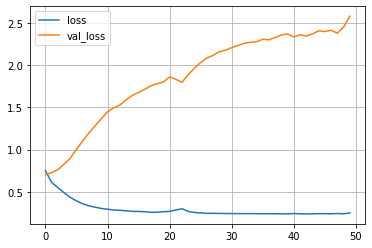

In [49]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

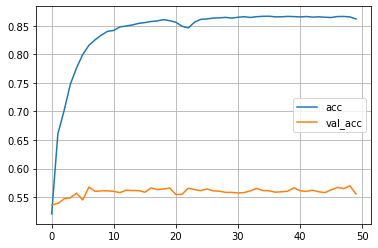

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()

In [51]:
preds = model2.predict(x_test)
acc = [np.argmax(preds[i])==y_test[i] for i in range(len(preds))]
print(f"precision: {np.sum(acc)/len(acc)}")

precision: 0.5020587817691324


In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
y_pred_keras = model2.predict(x_train).ravel()
fpr_train_keras, tpr_train_keras, thresholds_keras = roc_curve(y_train, y_pred_keras)

In [54]:
auc_train_keras = auc(fpr_train_keras, tpr_train_keras)
auc_train_keras

0.881085416640578

In [55]:
y_pred_keras = model2.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [56]:
auc_keras = auc(fpr_keras, tpr_keras)

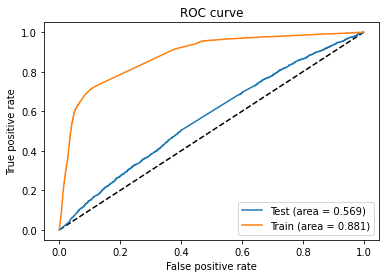

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Test (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_train_keras, tpr_train_keras, label='Train (area = {:.3f})'.format(auc_train_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [39]:
x_train[0]

array([-0.46630857,  0.08384648,  0.16267476, ..., -0.07871404,
       -0.05974841, -0.08005171])

In [44]:
#vamos a explorar el vocabulario

In [40]:
from data_generator import generate_training_data
from tokenizers import tokenize_documents

In [41]:
corpus = df_mini["texto_limpio"].values
corpus[1]

'presidente joe hecho control dos cámaras congreso tras ganar ayer elecciones senado allana así camino nueva administración unidos tomará relevo donald trump previsiblemente 20 adopte estímulos económicos perspectivas mayor paquete fiscal regulación corporativa impuestos compañías grandes fortunas favorecen sectores bursátiles perjudican expertos señalan valores energía biotecnológicas infraestructuras grandes beneficiados mientras farmacia tecnología inversores esperan control senado obtenido biden permita sacar adelante mayor gasto infraestructuras impulsar primera economía devastada programa infraestructuras pudo salir adelante mandato trump precisamente falta acuerdo demócratas republicanos alcance importe nuevo escenario beneficia empresas según verían impulsadas todas españolas operan ee ferrovial relacionadas materiales operaciones acerinox sacan partido compañías energías siemens gamesa iberdrola bien posicionada renovables ee información asalto partidarios trump congreso ee uu

In [42]:
int_corpus, word_corpus, word2id, id2word = tokenize_documents(corpus)
vocab_size = len(word2id) + 1
num_ns=1
print('Tamaño del vocabulario:', vocab_size)
print('Muestra del vocabulario:', list(word2id.items())[:10])

Tamaño del vocabulario: 90825
Muestra del vocabulario: [('millones', 1), ('mientras', 2), ('tras', 3), ('euros', 4), ('año', 5), ('según', 6), ('banco', 7), ('años', 8), ('empresas', 9), ('mercado', 10)]


In [43]:
sum_name_features = name_features.sum(axis=0)
sum_name_features

0          138
00          26
000         22
0000         1
00000        6
          ... 
útiles      65
útimas       3
útimo        1
útimos       2
útlimos      1
Length: 90720, dtype: int64

In [44]:
df_order = sum_name_features.sort_values(ascending=False)
df_order

millones         32652
mientras         18873
tras             17193
euros            16908
año              16138
                 ...  
desempolvando        1
paparazzi            1
papal                1
desencadenaba        1
útlimos              1
Length: 90720, dtype: int64

In [45]:
df_order.head(50)

millones      32652
mientras      18873
tras          17193
euros         16908
año           16138
según         14862
banco         13974
años          13732
empresas      12661
mercado       12376
dos           12335
ibex          11838
frente        11457
así           10859
parte         10643
sido          10561
si            10519
precio        10446
españa        10406
sector        10295
puntos        10174
mayor          9801
presidente     9465
compañía       9413
gobierno       9164
sesión         8610
ser            8576
referencia     8573
grupo          8549
35             8398
tres           8079
española       7940
aunque         7926
primer         7881
pasado         7828
después        7711
cuenta         7632
semana         7292
interés        7218
inversores     7160
través         7142
resto          7134
solo           7079
caso           7028
primera        7019
nuevo          7003
empresa        6782
datos          6607
cada           6585
nueva          6580


In [46]:
df_order.tail(40000)

desprestigiando    2
singularu          2
organoides         2
deficientes        2
organza            2
                  ..
desempolvando      1
paparazzi          1
papal              1
desencadenaba      1
útlimos            1
Length: 40000, dtype: int64

In [47]:
df_order[df_order>100]

millones           32652
mientras           18873
tras               17193
euros              16908
año                16138
                   ...  
remoto               101
monedas              101
incorporaciones      101
balances             101
estadio              101
Length: 6314, dtype: int64

<AxesSubplot:>

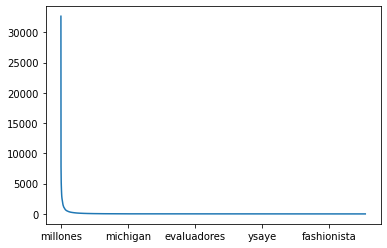

In [48]:
df_order.plot()

<AxesSubplot:>

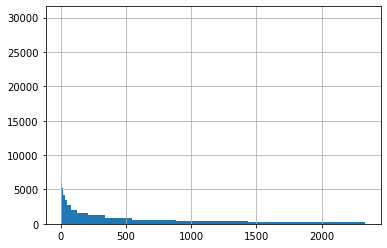

In [49]:
df_order.hist(bins=np.logspace(0,4,20).tolist()[:-3])

In [ ]:
#VAMOS A LEMATIZAR Y QUEDARNOS CON 3000 FEATURES POSITIVAS Y 3000 FEATURES NEGATIVAS PARA POSTERIORMENTE CONCATERNARLAS Y LANZAR OTRO MODELO

In [50]:
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("es_core_news_sm")
    def __call__(self, doc):
        doc = self.nlp(doc)
        tokens = []
        for token in doc:
            lexeme = self.nlp.vocab[token.text]
            if lexeme.is_stop == False and not lexeme.is_punct and token.text.isalnum():
                tokens.append(token.lemma_)
        return tokens

In [57]:
cv2 = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = LemmaTokenizer())

In [52]:
# df_mini = df_mini[df_mini['label'] > 0] #positivos
df_mini = df_mini[df_mini['label'] < 0] #negativos

In [54]:
df_mini['texto_limpio'] = df_mini['body'].apply(
    lambda x: ' '.join(
        [word.lower() for word in x.split() 
        if word.lower() not in (stop) and word.isalnum()]
        )
    )
df_mini.head(4)

C:\Users\Tienda\AppData\Local\Temp/ipykernel_24756/472020138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['texto_limpio'] = df_mini['body'].apply(


,ticker,date,body,r_adj,label,texto_limpio
12,ANA,2021-01-08 09:20:00.000,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 ha ...",-0.021573,-1,8 ibex 35 iniciado sesión viernes subida lleva...
13,ANA,2021-01-08 12:15:00.000,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 cot...",-0.021573,-1,8 ibex 35 cotizaba prácticamente plano media s...
14,ANA,2021-01-09 17:54:05.000,"Las transformaciones del turismo, las telecomu...",-0.021573,-1,transformaciones construcción industria motor ...
15,ANA,2021-01-11 06:07:56.000,La dificultad para competir con Renfe Mercancí...,-0.021573,-1,dificultad competir renfe mercancías 16 años d...


In [55]:
print(df_mini.shape)
df_mini

(10666, 6)


,ticker,date,body,r_adj,label,texto_limpio
12,ANA,2021-01-08 09:20:00.000,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 ha ...",-0.021573,-1,8 ibex 35 iniciado sesión viernes subida lleva...
13,ANA,2021-01-08 12:15:00.000,"MADRID, 8 Ene. (EUROPA PRESS) - El Ibex 35 cot...",-0.021573,-1,8 ibex 35 cotizaba prácticamente plano media s...
14,ANA,2021-01-09 17:54:05.000,"Las transformaciones del turismo, las telecomu...",-0.021573,-1,transformaciones construcción industria motor ...
15,ANA,2021-01-11 06:07:56.000,La dificultad para competir con Renfe Mercancí...,-0.021573,-1,dificultad competir renfe mercancías 16 años d...
16,ANA,2021-01-11 08:39:21.000,Los mercados interrumpen la racha de subidas. ...,-0.021573,-1,mercados interrumpen racha aumento casos conse...
...,...,...,...,...,...,...
53473,TEF,2021-12-30 06:13:41.000,"“Todos tendrán su baja, tal y como se ha hecho...",-0.019280,-1,tal hecho principio mensaje tranquilizador dab...
53474,TEF,2021-12-30 08:27:05.000,La última sesión del año en la Bolsa española ...,-0.019280,-1,última sesión año bolsa española transcurrido ...
53475,TEF,2021-12-30 08:31:09.000,17:46La Comunidad Valenciana notifica 10.889 n...,-0.019280,-1,comunidad valenciana notifica nuevos contagios...
53476,TEF,2021-12-30 08:52:26.000,19:12Compromís pide a Ximo Puig «evaluar todas...,-0.019280,-1,pide ximo puig todas posibles frente coronavir...


In [58]:
cv2.fit(df_mini['texto_limpio'])

CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x00000234D82EA550>)

In [59]:
vector2 = cv2.transform(df_mini['texto_limpio'])

In [60]:
name_features2 = pd.DataFrame(vector2.toarray(), columns=cv2.get_feature_names(), index= df_mini.index)
name_features2

c:\Users\Tienda\Desktop\MasterIA\TFM\tfm-miax7\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tú él,0,00,000,0000,00000,0002,00206,0034,0060031,...,únicamente,únicas,único,úrsula,útero,útil,útima,útimo,útlimo,şahin
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53474,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
sum_name_features2 = name_features2.sum(axis=0)
sum_name_features2

 tú él      1
0          74
00         14
000        11
0000        1
         ... 
útil      154
útima       2
útimo       1
útlimo      1
şahin       1
Length: 55019, dtype: int64

In [62]:
df_order2 = sum_name_features2.sort_values(ascending=False)
df_order2

millón       16774
año          14943
banco         9493
empresa       9259
mercado       8012
             ...  
hostigado        1
hostalet         1
host             1
hoss             1
şahin            1
Length: 55019, dtype: int64

In [63]:
df_order2[df_order2>100]

millón     16774
año        14943
banco       9493
empresa     9259
mercado     8012
           ...  
votar        101
suárez       101
hermana      101
veto         101
49           101
Length: 3195, dtype: int64

In [25]:
# df_order2[df_order2>100].to_csv('../pos_features.csv')
# df_order2[df_order2>100].to_csv('../neg_features.csv')

In [64]:
df_pos = pd.read_csv('../pos_features.csv')
df_pos

,Unnamed: 0,0
0,millón,16066
1,año,14615
2,banco,9930
3,empresa,9247
4,mercado,7951
...,...,...
3163,cory,101
3164,docente,101
3165,ruptura,101
3166,habilitado,101


In [65]:
df_neg = pd.read_csv('../neg_features.csv')
df_neg

,Unnamed: 0,0
0,millón,16774
1,año,14943
2,banco,9493
3,empresa,9259
4,mercado,8012
...,...,...
3190,votar,101
3191,suárez,101
3192,hermana,101
3193,veto,101
